In [101]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [102]:
df1 = pd.read_csv("D:/Project/Used dataset/NFLX(2013_2023)new.csv",parse_dates = True, index_col=0)
print(df1.index)

C:\Users\SGG\AppData\Local\Temp\ipykernel_13852\3103809994.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1 = pd.read_csv("D:/Project/Used dataset/NFLX(2013_2023)new.csv",parse_dates = True, index_col=0)


DatetimeIndex(['2013-02-01', '2013-03-01', '2013-04-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-01-14', '2013-01-15',
               ...
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Date', length=2621, freq=None)


In [103]:
df=df1
df = df.dropna()
df

,Open,High,Low,Close,Prev_Close,Volume
Date,,,,,,
2013-02-01,13.601429,13.687143,12.955714,13.144286,13.144286,19431300
2013-03-01,13.138571,13.988571,13.075714,13.798571,13.798571,27912500
2013-04-01,13.791429,13.958571,13.648571,13.711429,13.711429,17761100
2013-07-01,13.770000,14.535714,13.731429,14.171429,14.171429,45550400
2013-08-01,14.287143,14.427143,13.828571,13.880000,13.880000,24714900
...,...,...,...,...,...,...
2023-05-24,356.929993,367.149994,356.630005,364.850006,364.850006,7973300
2023-05-25,359.609985,367.450012,357.420013,359.000000,359.000000,6263100
2023-05-26,361.100006,383.760010,356.000000,378.880005,378.880005,9360400


In [104]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100

df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100

df = df[['Prev_Close','High_Low_per','Per_change','Volume']]

label_col = 'Prev_Close'

In [105]:
forecast_ceil = int(math.ceil(0.001*len(df)))
#math.ceil rounds to the top

In [106]:
df['label'] = df[label_col].shift(-forecast_ceil)

C:\Users\SGG\AppData\Local\Temp\ipykernel_13852\3692539325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df[label_col].shift(-forecast_ceil)


In [107]:
#feaures X, labels Y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

X_lately

C:\Users\SGG\AppData\Local\Temp\ipykernel_13852\111108011.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))


array([[ 0.65866521,  0.4765336 ,  0.        , -0.45577395],
       [ 0.71023311, -0.61555203,  0.        , -0.36442284],
       [ 0.67618435,  0.5131715 ,  0.        , -0.50552532]])

In [108]:
df.dropna(inplace=True)

C:\Users\SGG\AppData\Local\Temp\ipykernel_13852\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [109]:
#X = X[:-forecast_out+1]#all the points 
y = np.array(df['label'])

In [110]:
len(X),len(y)

(2618, 2618)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [112]:
clf = svm.SVR(kernel='poly') #svm.SVR() 

In [113]:
clf.fit(X_train, y_train) #train

SVR(kernel='poly')

In [122]:
accuracy = clf.score(X_test, y_test)*100 #test Accuracy squared error for linreg

In [123]:
print(accuracy) #directionally accurate

63.685227824251086


In [116]:
clf1 = svm.SVR(kernel='rbf')
clf1.fit(X_train, y_train)

SVR()

In [125]:
accuracy = clf1.score(X_test, y_test)
print(accuracy)

0.8920848282197266


In [118]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [119]:
print(forecast_set, accuracy)#forecast_out) # stockprices next 30 days

[220.69536973 222.11713375 223.38743624] 0.8920848282197266


In [120]:
df['Forecast'] = np.nan

C:\Users\SGG\AppData\Local\Temp\ipykernel_13852\3512028689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan


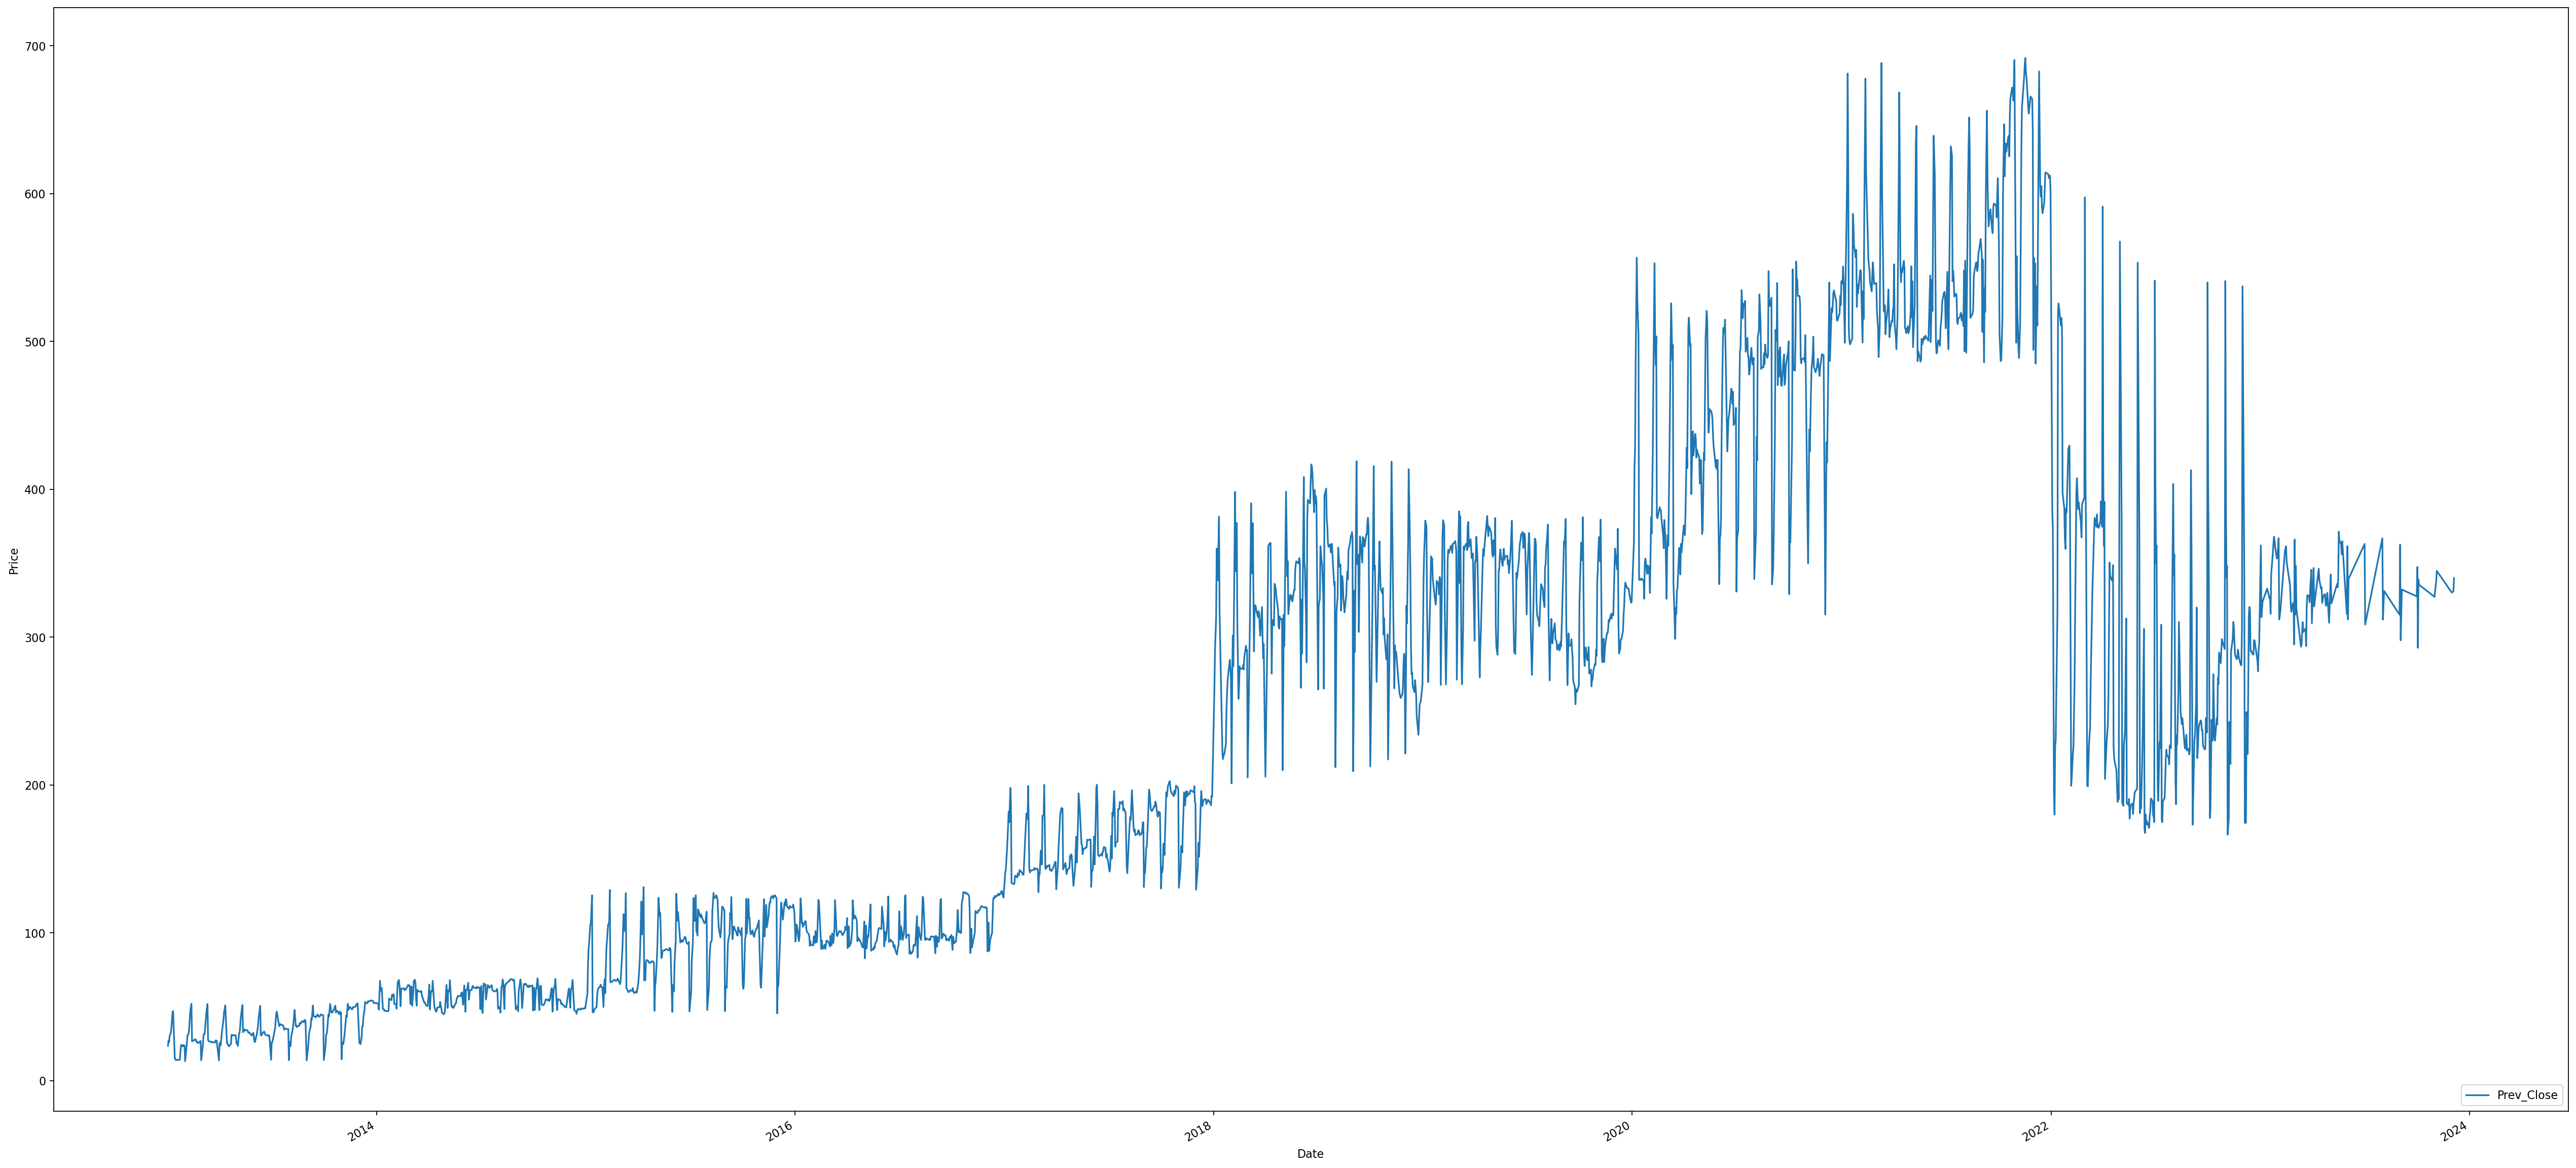

In [121]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
df['Prev_Close'].plot()
#df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()